# Problem 3: Google Playstore Apps Dataset

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_excel('GooglePlaystore.xlsx')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres         Last Updated         Current Ver  \
0               Art & Design  2018-01-07 00:00:00               1.0.0   
1  Art & Design;Pretend Play  2018-01-15 00:00:00               2.0.0   
2               Art & Design  2018-08-01 00:00:00               1.2.4   
3               Art & Design  2018-06-08 00:00:00  Varies with device   
4    Art & Design;Creativity  2018-06-20 00:00:00                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

## PART 1: PREPROCESSING

1.1 Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.

In [3]:
# Delete row where 'Reviews' == 3.0M
df = df[df['Reviews'] != '3.0M']

1.2 Remove rows where any of the columns has the value "Varies with device".

In [4]:
# Delete rows where any column == 'Varies with device'
df = df[~df.isin(['Varies with device']).any(axis=1)]
df.head()  #row 3 got deleted

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   

  Reviews  Size    Installs  Type Price Content Rating  \
0     159   19M     10,000+  Free     0       Everyone   
1     967   14M    500,000+  Free     0       Everyone   
2   87510  8.7M  5,000,000+  Free     0       Everyone   
4     967  2.8M    100,000+  Free     0       Everyone   
5     167  5.6M     50,000+  Free     0       Everyone   

                      Genres         Last Updated Current Ver   Android Ver  
0               Art & Design  2018-01-07 00:00:00       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  2018-01-15 00:00:00       2.0.0  4.0.3 and up  
2               Art & Design  2018-08-01 00:00:00       1.2.4  4.0.3 and up  
4    Art & Design;Creativity  2018-06-20 00:00:00         1.1    4.4 and up  
5               Art & Design  2017-03-26 00:00:00           1    2.3 and up

1.3 The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6".

In [5]:
# Strip trailing non-numeric characters from Android version
def clean_ver(ver):
    match = re.search('\d+\.\d+', str(ver))
    if match:
        return float(match.group())
    return np.nan

df['Android Ver'] = df['Android Ver'].apply(clean_ver)
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   

  Reviews  Size    Installs  Type Price Content Rating  \
0     159   19M     10,000+  Free     0       Everyone   
1     967   14M    500,000+  Free     0       Everyone   
2   87510  8.7M  5,000,000+  Free     0       Everyone   
4     967  2.8M    100,000+  Free     0       Everyone   
5     167  5.6M     50,000+  Free     0       Everyone   

                      Genres         Last Updated Current Ver  Android Ver  
0               Art & Design  2018-01-07 00:00:00       1.0.0          4.0  
1  Art & Design;Pretend Play  2018-01-15 00:00:00       2.0.0          4.0  
2               Art & Design  2018-08-01 00:00:00       1.2.4          4.0  
4    Art & Design;Creativity  2018-06-20 00:00:00         1.1          4.4  
5               Art & Design  2017-03-26 00:00:00           1          2.3

1.4 The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.

In [6]:
# Convert installs to int and drop other rows
def clean_installs(installs):
    ret = re.sub('[,\+]', '', installs)
    try:
        ret = int(ret)
    except ValueError as ex:
        ret = np.nan
    return ret

df['Installs'] = df['Installs'].apply(clean_installs)
df = df[df['Installs'] != np.nan]
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   

  Reviews  Size  Installs  Type Price Content Rating  \
0     159   19M     10000  Free     0       Everyone   
1     967   14M    500000  Free     0       Everyone   
2   87510  8.7M   5000000  Free     0       Everyone   
4     967  2.8M    100000  Free     0       Everyone   
5     167  5.6M     50000  Free     0       Everyone   

                      Genres         Last Updated Current Ver  Android Ver  
0               Art & Design  2018-01-07 00:00:00       1.0.0          4.0  
1  Art & Design;Pretend Play  2018-01-15 00:00:00       2.0.0          4.0  
2               Art & Design  2018-08-01 00:00:00       1.2.4          4.0  
4    Art & Design;Creativity  2018-06-20 00:00:00         1.1          4.4  
5               Art & Design  2017-03-26 00:00:00           1          2.3

1.5 For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

In [7]:
# Fill missing ratings and drop unrated unpopular apps
df = df[((df['Installs'] >= 50000) | (df['Reviews'] >= 100)) | ~df['Rating'].isna()]
df['Rating'] = df.groupby('Category')['Rating'].apply(lambda x: x.fillna(round(x.mean(), 2)))

1.6 Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.

In [8]:
# Turn size into int
def clean_size(size):
    match = re.search("(?P<num>\d*\.?\d+)(?P<exp>\w)", size)
    if (match):
        mdict = match.groupdict()
        xdict = {'M' : 6, 'K' : 3}
        num = float(mdict['num'])
        exp = xdict[mdict['exp'].upper()]
        return num * (10 ** exp)
    return size

df['Size'] = df['Size'].apply(clean_size)

In [9]:
# Other dtype conversion and final results
df[['Reviews', 'Price']] = df[['Reviews', 'Price']].apply(pd.to_numeric)

df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   

   Reviews        Size  Installs  Type  Price Content Rating  \
0      159  19000000.0     10000  Free    0.0       Everyone   
1      967  14000000.0    500000  Free    0.0       Everyone   
2    87510   8700000.0   5000000  Free    0.0       Everyone   
4      967   2800000.0    100000  Free    0.0       Everyone   
5      167   5600000.0     50000  Free    0.0       Everyone   

                      Genres         Last Updated Current Ver  Android Ver  
0               Art & Design  2018-01-07 00:00:00       1.0.0          4.0  
1  Art & Design;Pretend Play  2018-01-15 00:00:00       2.0.0          4.0  
2               Art & Design  2018-08-01 00:00:00       1.2.4          4.0  
4    Art & Design;Creativity  2018-06-20 00:00:00         1.1          4.4  
5               Art & Design  2017-03-26 00:00:00           1          2.3

## PART 2: ANALYSIS

2.1  Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.

In [10]:
# Ratings data by category
stats = pd.DataFrame()
for category in df['Category'].unique():
    row = dict({'category': category}, **df[df['Category'] == category]['Rating'].describe().to_dict())
    if (stats.empty):
        stats = pd.DataFrame(row, index=[0])
    else:
        stats = stats.append(row, ignore_index=True)
stats

category   count      mean       std  min    25%   50%    75%  \
0        ART_AND_DESIGN    59.0  4.358644  0.365322  3.2  4.100  4.40  4.700   
1     AUTO_AND_VEHICLES    62.0  4.146774  0.569935  2.1  3.900  4.25  4.500   
2                BEAUTY    40.0  4.291750  0.356175  3.1  4.075  4.30  4.525   
3   BOOKS_AND_REFERENCE   147.0  4.320136  0.453084  2.7  4.100  4.40  4.600   
4              BUSINESS   246.0  4.119187  0.662586  1.0  3.825  4.30  4.500   
5                COMICS    49.0  4.154082  0.550363  2.8  3.800  4.40  4.600   
6         COMMUNICATION   210.0  4.100952  0.502624  1.0  3.900  4.20  4.400   
7                DATING   174.0  3.957816  0.664204  1.0  3.600  4.10  4.400   
8             EDUCATION   110.0  4.392636  0.254395  3.5  4.300  4.40  4.600   
9         ENTERTAINMENT    86.0  4.145349  0.291308  3.0  4.000  4.20  4.300   
10               EVENTS    36.0  4.474167  0.340037  3.7  4.300  4.50  4.725   
11              FINANCE   263.0  4.114068  0.683553  1.0  3.900  4.30  4.500   
12       FOOD_AND_DRINK    86.0  4.097674  0.573529  1.7  3.800  4.20  4.500   
13   HEALTH_AND_FITNESS   220.0  4.215455  0.696722  1.4  4.000  4.50  4.600   
14       HOUSE_AND_HOME    58.0  4.162414  0.376299  2.8  4.000  4.20  4.475   
15   LIBRARIES_AND_DEMO    68.0  4.202941  0.350254  3.1  4.000  4.20  4.400   
16            LIFESTYLE   280.0  4.093143  0.714612  1.5  3.800  4.20  4.600   
17                 GAME   956.0  4.268588  0.378420  1.0  4.100  4.30  4.500   
18               FAMILY  1611.0  4.189609  0.514460  1.0  4.000  4.30  4.500   
19              MEDICAL   321.0  4.180374  0.676356  1.0  3.900  4.30  4.600   
20               SOCIAL   170.0  4.257059  0.484289  1.9  4.100  4.30  4.600   
21             SHOPPING   178.0  4.226404  0.439606  1.6  4.100  4.30  4.500   
22          PHOTOGRAPHY   234.0  4.145726  0.512675  2.0  4.000  4.30  4.500   
23               SPORTS   248.0  4.204839  0.466767  1.5  4.000  4.30  4.500   
24     TRAVEL_AND_LOCAL   155.0  4.029677  0.556680  2.2  3.700  4.20  4.400   
25                TOOLS   633.0  4.010616  0.638232  1.0  3.800  4.20  4.400   
26      PERSONALIZATION   277.0  4.322022  0.368190  2.5  4.100  4.40  4.600   
27         PRODUCTIVITY   232.0  4.140690  0.581525  1.0  4.000  4.20  4.500   
28            PARENTING    48.0  4.347917  0.397058  3.1  4.100  4.40  4.625   
29              WEATHER    49.0  4.242857  0.349404  3.3  4.000  4.30  4.500   
30        VIDEO_PLAYERS   114.0  4.029211  0.593726  1.8  3.725  4.20  4.400   
31   NEWS_AND_MAGAZINES   171.0  4.141637  0.586858  1.7  3.950  4.30  4.500   
32  MAPS_AND_NAVIGATION    94.0  4.004255  0.556663  1.9  3.700  4.20  4.400   

    max  
0   5.0  
1   4.9  
2   4.9  
3   5.0  
4   5.0  
5   5.0  
6   5.0  
7   5.0  
8   4.9  
9   4.7  
10  5.0  
11  5.0  
12  5.0  
13  5.0  
14  4.8  
15  5.0  
16  5.0  
17  5.0  
18  5.0  
19  5.0  
20  5.0  
21  5.0  
22  5.0  
23  5.0  
24  5.0  
25  5.0  
26  5.0  
27  5.0  
28  5.0  
29  4.8  
30  4.9  
31  5.0  
32  4.9

2.2 Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:

In [11]:
# Statistics on free apps
free_df = df[df['Type'] == 'Free']

def top3(df, column):
    return df.nlargest(3, column)

2.2.a Rating (gives top 3 most highly rated applications in each category)

In [12]:
# Top 3 free apps by rating
top3(free_df, 'Rating')[['App', 'Category', 'Rating']]

App Category  Rating
329   Hojiboy Tojiboyev Life Hacks   COMICS     5.0
612  American Girls Mobile Numbers   DATING     5.0
615                   Awake Dating   DATING     5.0

2.2.b Installs (gives top 3 most installed applications in each category)

In [13]:
# Top 3 free apps by installs
top3(free_df, 'Installs')[['App', 'Category', 'Installs']]

App Category    Installs
1654  Subway Surfers     GAME  1000000000
1700  Subway Surfers     GAME  1000000000
1750  Subway Surfers     GAME  1000000000

2.2.c Reviews (gives top 3 most reviewed applications in each category) 

In [14]:
# Top 3 free apps by most reviews
top3(free_df, 'Reviews')[['App', 'Category', 'Reviews']]

App Category   Reviews
1879  Clash of Clans     GAME  44893888
1670  Clash of Clans     GAME  44891723
1704  Clash of Clans     GAME  44891723

2.3 Find the average, maximum and minimum price of the paid applications.

In [15]:
# Statistics on paid apps
paid_df = df[df['Type'] == 'Paid']
paid_df['Price'].describe()[['mean', 'min', 'max']]

mean     15.139164
min       0.990000
max     400.000000
Name: Price, dtype: float64

## PART 3: VISUALIZATION

3.1 In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’]. Count the number of applications per genre and display it using a pie chart.

In [16]:
# Break string of genres into list
def clean_genres(genres):
    genrelist = genres.split(';')
    return genrelist

df['Genres'] = df['Genres'].apply(clean_genres)

Text(0.5, 1.0, 'Applications per Genre')

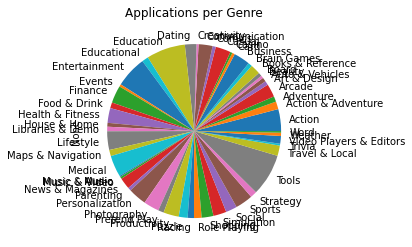

In [17]:
# Ugly piechart
pie = df.explode('Genres').groupby('Genres').size().plot.pie()
pie.set_title('Applications per Genre')

3.2 Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.

Text(0.5, 0, 'Category')

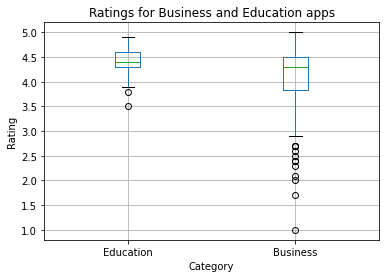

In [18]:
# Ugly boxplots
edu = df[df['Category'] == 'EDUCATION']['Rating']
bn = df[df['Category'] == 'BUSINESS']['Rating']
bplotdf = pd.concat([edu, bn], axis=1)
bplotdf.columns = ['Education', 'Business']
bplot = bplotdf.boxplot()
bplot.set_title('Ratings for Business and Education apps')
bplot.set_ylabel('Rating')
bplot.set_xlabel('Category')